In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv("Breast_cancer_data.csv")
cancer.head(5)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


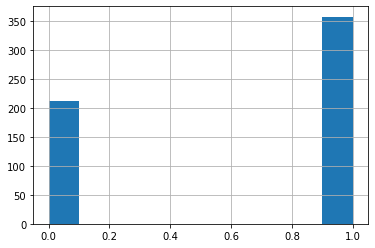

In [3]:
cancer["diagnosis"].hist()

In [4]:
cancer["mean_radius_c"]=pd.cut(cancer["mean_radius"].values,bins = 3, labels = [0,1,2])
cancer["mean_texture_c"]=pd.cut(cancer["mean_texture"].values,bins = 3, labels = [0,1,2])
cancer["mean_smoothness_c"]=pd.cut(cancer["mean_smoothness"].values,bins = 3, labels = [0,1,2])

cancer = cancer.drop(columns=["mean_radius", "mean_texture", "mean_smoothness"])
cancer = cancer[["mean_radius_c","mean_texture_c","mean_smoothness_c", "diagnosis"]]
cancer.head(5)

,mean_radius_c,mean_texture_c,mean_smoothness_c,diagnosis
0,1,0,1,0
1,1,0,0,0
2,1,1,1,0
3,0,1,2,0
4,1,0,1,0


In [5]:

def likelihood_categorical (df, feat_name,feat_val,Y,label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    p_x_given_y = len(df[df[feat_name]==feat_val])/len(df)
    return p_x_given_y

In [6]:
def calculate_prior(df,Y):
    classes = sorted (list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

In [7]:
def naive_bayes(df,X,Y):
    features = list(df.columns)[:-1]
    
    #calculate prior
    prior = calculate_prior(df,Y)
    
    Y_pred = []
    
    for val in X:
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j]*=likelihood_categorical(df,features[i],val[i],Y,labels[j])
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j]*prior[j]
        Y_pred.append(np.argmax(post_prob))
    return np.array(Y_pred)

In [9]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(cancer, test_size=.2, random_state=17)
print(len(test))
print(len(train))
X_test = test.iloc[:,:-1].values
Y_test = test.iloc[:,-1].values
Y_pred = naive_bayes(train, X=X_test, Y="diagnosis")

from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

114
455
[[34  4]
 [ 4 72]]
0.9473684210526315
